In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [6]:
train_ds=dataset.take(54)
len(train_ds)

54

In [7]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [8]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [9]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)
print(tf.__version__)




2.16.1


In [19]:
from tensorflow.keras.layers import Normalization
normalizer = Normalization()
from tensorflow.keras.layers import Rescaling
rescaler = Rescaling(scale=1./255)
from tensorflow.keras.layers import RandomFlip, RandomRotation
flip_layer = RandomFlip(mode='horizontal')
rotate_layer = RandomRotation(factor=0.2)


In [20]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Resizing, Rescaling

IMAGE_SIZE = 224  

resize_and_rescale = tf.keras.Sequential([
    Resizing(IMAGE_SIZE, IMAGE_SIZE),
    Rescaling(1.0/255),
])


In [22]:
import tensorflow as tf
from tensorflow.keras.layers import RandomFlip, RandomRotation

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
])


In [23]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

C:\Users\prasanth\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=40,
)

Epoch 1/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 863ms/step - accuracy: 0.5010 - loss: 0.9197 - val_accuracy: 0.5573 - val_loss: 0.8145
Epoch 2/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 914ms/step - accuracy: 0.6494 - loss: 0.7091 - val_accuracy: 0.7396 - val_loss: 0.5628
Epoch 3/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 928ms/step - accuracy: 0.7636 - loss: 0.5589 - val_accuracy: 0.8333 - val_loss: 0.4293
Epoch 4/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 933ms/step - accuracy: 0.8200 - loss: 0.4176 - val_accuracy: 0.8385 - val_loss: 0.4229
Epoch 5/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 817ms/step - accuracy: 0.8688 - loss: 0.3153 - val_accuracy: 0.8646 - val_loss: 0.3033
Epoch 6/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 856ms/step - accuracy: 0.8594 - loss: 0.3372 - val_accuracy: 0.8750 - val_loss: 0.2616
Epoch 7/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 819ms/step - accuracy: 0.9290 - loss: 0.1656 - val_accuracy: 0.9583 - val_loss: 0.1711
Epoch 8/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 807ms/step - accuracy: 0.9529 - loss: 0.1430 - val_accu

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
EPOCHS=40

In [ ]:
len(history.history['loss'])

In [ ]:

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
predicted label: Potato___Late_blight


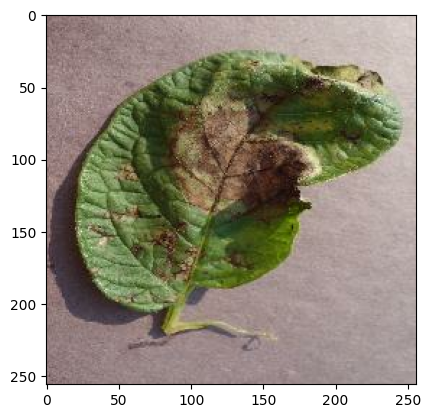

In [41]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [42]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [43]:
import os

# Determine the new model version number
model_version = max([int(i.split('.')[0]) for i in os.listdir("../models") if i.endswith('.keras')] + [0]) + 1
print(model_version)

# Save the model in the new Keras format
model.save(f"../models/{model_version}.keras")


FileNotFoundError: [WinError 3] The system cannot find the path specified: '../models'